<a href="https://colab.research.google.com/github/yagnik99/Sales_Prediction-Rossmann_Store/blob/main/Yagnik_Pandya_Team_4_Capstone_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### Importing required libraries

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder = '/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 1/Capstone Project 2/data/'

###Importing 1st Dataset.

In [ ]:
Rossmann_df = pd.read_csv(folder + 'Rossmann Stores Data.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
Rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
Rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


### Above DF contains information on various stores associated with Rossmann. It has information for sales, customers, holidays, different Promos for every weekdays with dates. 

### There are no null/ missing values.

###Let's see for how much time this data was collected. 

In [ ]:
print(Rossmann_df['Date'].min(),'- start')
print(Rossmann_df['Date'].max(), '- end')

2013-01-01 - start
2015-07-31 - end


### It is almost 2 years data.

In [ ]:
### Checking for Duplicates
Rossmann_df[Rossmann_df.duplicated()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


In [ ]:
### Will Check sales is less than 0 for any day
Rossmann_df[Rossmann_df['Sales'] < 0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


In [ ]:
### If store is closed and there is sale
Rossmann_df[(Rossmann_df['Open'] == 0) & (Rossmann_df['Sales'] != 0)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


In [ ]:
# If store is closed and sales is 0
Rossmann_df[Rossmann_df['Open'] == 0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [ ]:
Rossmann_df[(Rossmann_df['Open'] == 0) & (Rossmann_df['Sales']==0)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [ ]:
Rossmann_df = Rossmann_df[(Rossmann_df['Open'] == 1)]

In [ ]:
Rossmann_df.drop(['Open'],axis = 1, inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


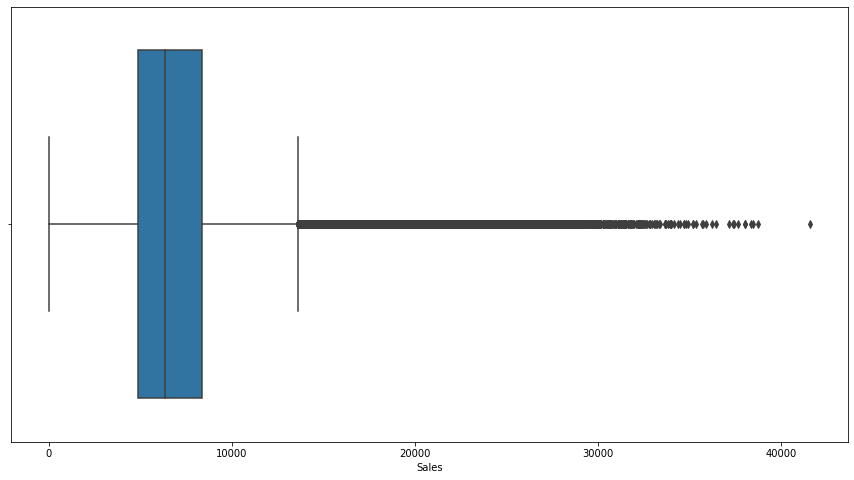

In [ ]:
sns.boxplot(Rossmann_df['Sales'])

### We have no misleading values in this dataset. i.e. No negative sales or sale when store was closed. 

### Many outliers on right side in above plot. So might be those stores are having high sales. 

### Exploring some features. 

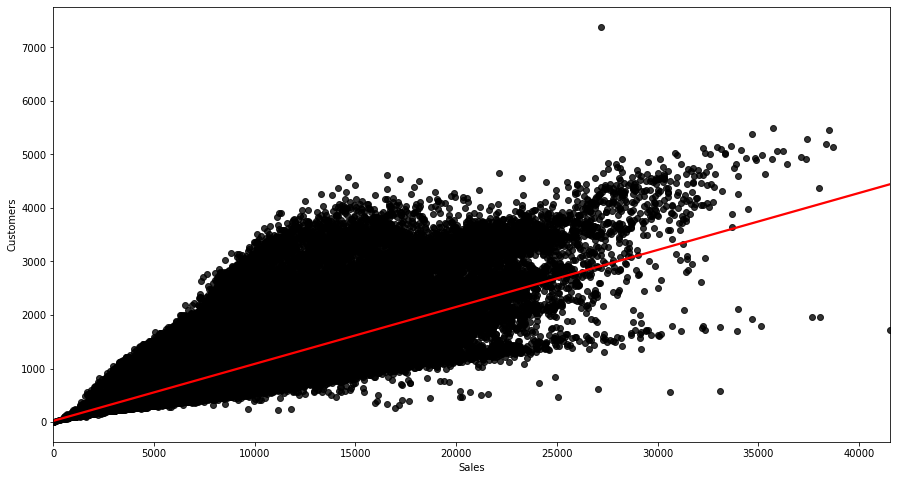

In [ ]:
# How customers affect sales
sns.regplot(x=Rossmann_df['Sales'], y=Rossmann_df['Customers'],scatter_kws={"color": "black"}, line_kws={"color": "red"})

In [ ]:
# How Sales differ in each day of week
Avg_week_sales = pd.DataFrame(Rossmann_df.groupby('DayOfWeek').agg({'Sales':'mean'}))
Avg_week_sales

,Sales
DayOfWeek,
1,8216.073074
2,7088.113656
3,6728.122978
4,6767.310159
5,7072.677012
6,5874.840238
7,8224.723908


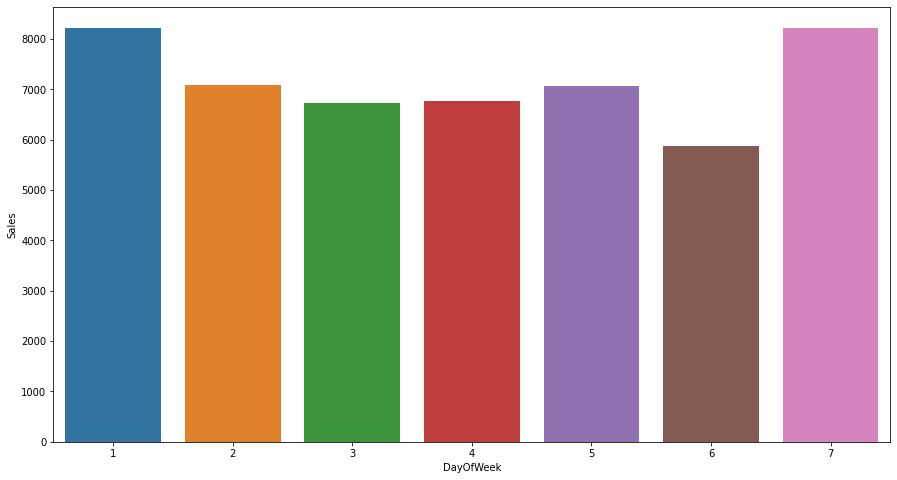

In [ ]:
sns.barplot(x=Avg_week_sales.index, y = Avg_week_sales['Sales'])

### High sales in starting of week. On Sunday almost no sale. Might be the stores are closed on that day or no customers. 

In [ ]:
Rossmann_df[(Rossmann_df['DayOfWeek']==7)]['Store'].unique()

array([  85,  122,  209,  259,  262,  274,  299,  310,  335,  353,  423,
        433,  453,  494,  512,  524,  530,  562,  578,  676,  682,  732,
        733,  769,  863,  867,  931,  948, 1045, 1081, 1097, 1099,  877])

### How sales differ with Promo

In [ ]:
Avg_Promo_sales = pd.DataFrame(Rossmann_df.groupby('Promo').agg({'Sales':'mean'}))
Avg_Promo_sales

,Sales
Promo,
0,5929.407603
1,8228.281239


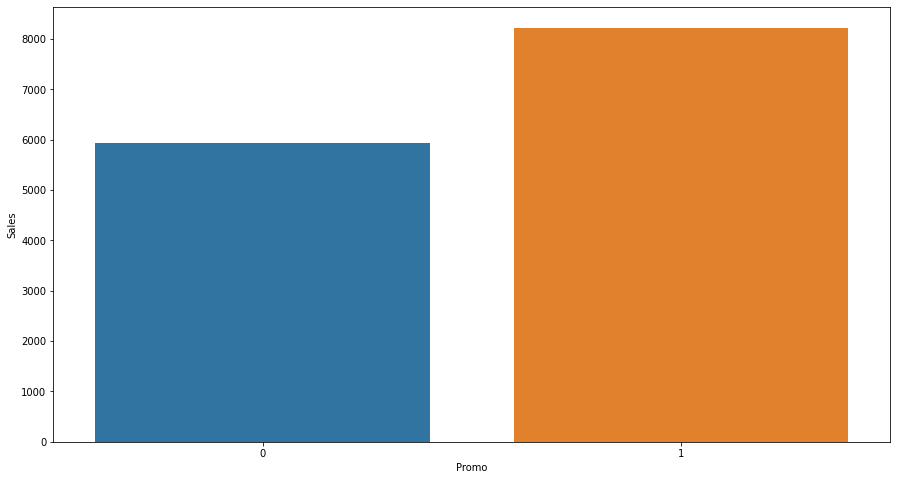

In [ ]:
sns.barplot(x=Avg_Promo_sales.index, y = Avg_Promo_sales['Sales'])

### How sales differ on holidays. 

In [ ]:
Avg_StateHoliday_sales = pd.DataFrame(Rossmann_df.groupby('StateHoliday').agg({'Sales':'mean'}))
Avg_SchoolHoliday_sales = pd.DataFrame(Rossmann_df.groupby('SchoolHoliday').agg({'Sales':'mean'}))

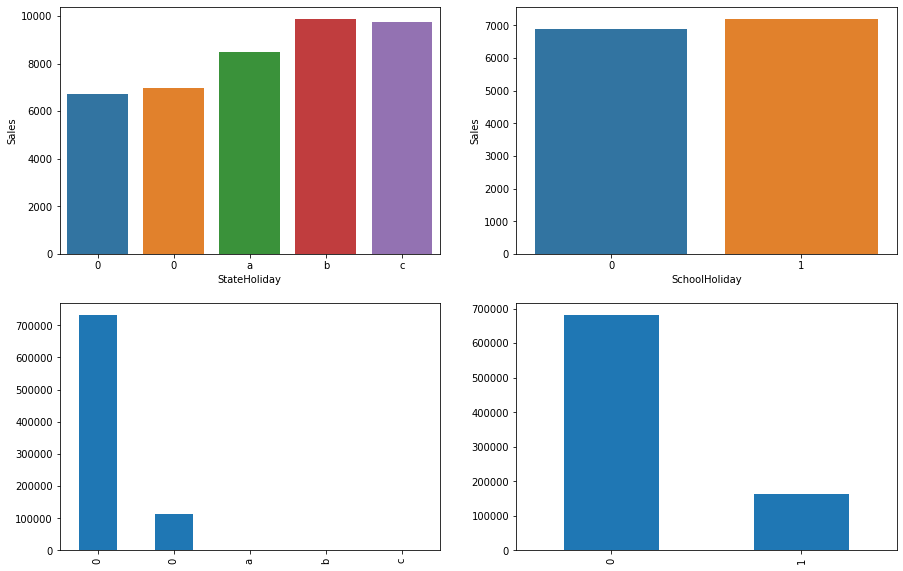

In [ ]:
# How sales differ in holidays
fig, ax = plt.subplots(2,2,figsize=(15,10))
ax1=plt.subplot(2, 2,1)
sns.barplot(x=Avg_StateHoliday_sales.index, y = Avg_StateHoliday_sales['Sales'])
ax1=plt.subplot(2, 2,2)
sns.barplot(x=Avg_SchoolHoliday_sales.index, y = Avg_SchoolHoliday_sales['Sales'])

# How many Total School and State holidays
ax1=plt.subplot(2, 2,4)
Rossmann_df['SchoolHoliday'].value_counts().plot(kind='bar')
ax1=plt.subplot(2, 2,3)
Rossmann_df['StateHoliday'].value_counts().plot(kind='bar')

### NO much difference in sales on School Holidays. On state holidays all stores are to be closed except few.

### But for state holidays we have two 0 columns and others are strings. So will convert all of them to numerical. 

In [ ]:
def num_state_holidays(string):
  if (string == 'a') | (string == 'b') | (string == 'c'):
    return 1
  else:
    return 0

In [ ]:
Rossmann_df['StateHoliday'] = Rossmann_df['StateHoliday'].apply(num_state_holidays)

In [ ]:
Rossmann_df['StateHoliday'].value_counts()

0    843482
1       910
Name: StateHoliday, dtype: int64

###We have gone through all features initially and have seen how they effect Sales. 

## **Meanwhile will see our next dataset and try to relate that dataset with this df.**

In [ ]:
#Importing Dataset
store_df = pd.read_csv(folder + 'store.csv')

In [ ]:
store_df.head(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [ ]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


###This dataset contains information on all stores. Like type of store, range of products, competitions and if store is participating in different promo and for how long.

### We have null/ missing values in some columns. Will try to deal with them first.

### Also we have store column that is common and will see if it is unique and we can merge to 1st DF.

In [ ]:
set(pd.DataFrame(Rossmann_df['Store'].value_counts()).index.to_list()) - set(pd.DataFrame(store_df['Store'].value_counts()).index.to_list())

set()

### Both have equal n same no of stores. So can merge based on this column after analysis done. 

### Check if Store participating in Promo and if no info for week, Year and Interval

In [ ]:
store_df[(store_df['Promo2'] == 1) & (store_df['Promo2SinceWeek'].isna()) ]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


In [ ]:
store_df[(store_df['Promo2'] == 1) & (store_df['Promo2SinceYear'].isna()) ]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


In [ ]:
store_df[(store_df['Promo2'] == 1) & (store_df['PromoInterval'].isna()) ]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


### No Promo, so no info and can replace Nan with 0.

In [ ]:
# Replacing Nan with 0 in below cols.
store_df.update(store_df[['PromoInterval']].fillna(0))

###For competition distance can directly replace Nan by mean, because only 3 missing values. 

### For Month and year can not use mean or mode as there are many missing values. So will try different methods like ffill and backfill to not get same values for all those missing.

In [ ]:
# Replacing missing values in competition distance with mean
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].mean(),inplace=True)

In [ ]:
# Replacing missing values in Competition open since month by ffill, limit = 2
#store_df[['CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']].fillna(method='ffill', limit = 2, inplace = True)

In [ ]:
# Filling rest values using backfill. So done manually
#store_df[['CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']].fillna(method='backfill', inplace = True)

In [ ]:
# 1 value was not filled
#store_df['CompetitionOpenSinceMonth'] = store_df['CompetitionOpenSinceMonth'].fillna(4)

In [ ]:
# 1 value was not filled. So done manually
#store_df['CompetitionOpenSinceYear'] = store_df['CompetitionOpenSinceYear'].fillna(2011)

In [ ]:
store_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                  0
dtype: int64

##Exploring Catagorical variables in Store Df.

### Store types count

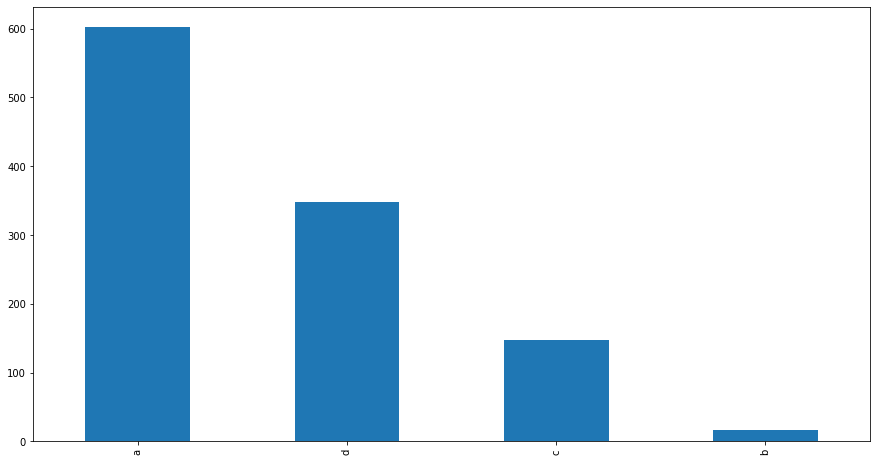

In [ ]:
store_df['StoreType'].value_counts().plot(kind='bar')

###Assortment counts

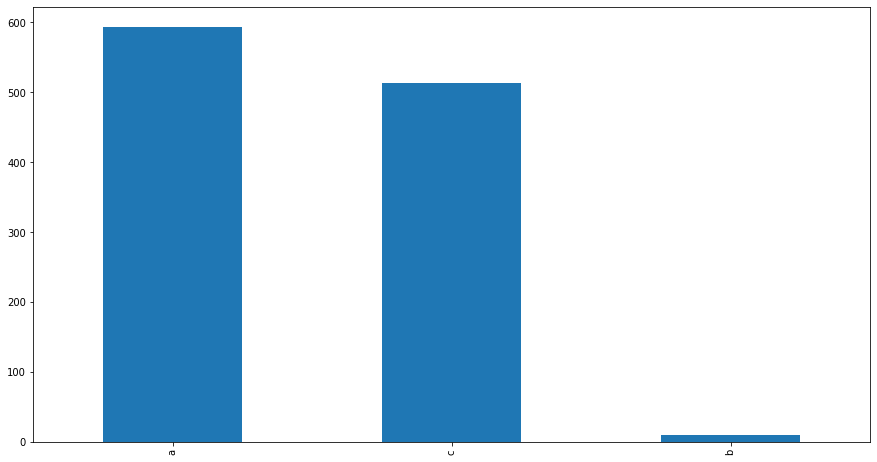

In [ ]:
store_df['Assortment'].value_counts().plot(kind='bar')

### Promo2

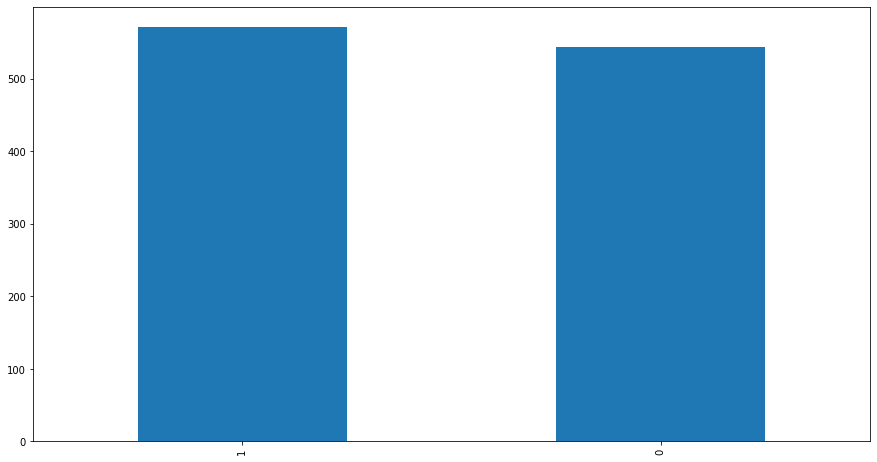

In [ ]:
store_df['Promo2'].value_counts().plot(kind='bar')

In [ ]:
store_df['PromoInterval'].value_counts()

0                   544
Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

###**Feature Eng**

In [ ]:
#store_df['Assortment_n_store_type'] = store_df['StoreType'] + store_df['Assortment']

### Will merge competition since month and year by calculating total months as 1 column.

### Last record was upto 2015-07-31 in previous dataset. So will compute competition upto that only. 

In [ ]:
#store_df['CompetitionOpenSinceYear'] = 2015 - store_df['CompetitionOpenSinceYear']

In [ ]:
#store_df['Total_competition_months'] = (store_df['CompetitionOpenSinceYear'] * 12) -(store_df['CompetitionOpenSinceMonth']-1) + 7

In [ ]:
# Removing both original columns
#store_df.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'],axis = 1, inplace=True)

### Doing same for Promo columns

In [ ]:
#store_df['Total_promo_years'] = store_df['Promo2SinceYear'].apply(Total_promo_year)

In [ ]:
#store_df['Total_promo_weeks'] = store_df['Promo2SinceWeek'].apply(Total_promo_week)

In [ ]:
#store_df['Total_promo_weeks'] = (store_df['Total_promo_years']*52) + store_df['Total_promo_weeks']

In [ ]:
# Dropping other columns
#store_df.drop(['Promo2SinceWeek','Promo2SinceYear','Total_promo_years'],axis=1, inplace=True)

###**Merging both Dfs**

In [ ]:
Final_df = pd.merge(Rossmann_df,store_df, on = 'Store', how = 'left')

In [ ]:
Final_df.shape

(844392, 17)

### Re arranging Final dataset

In [ ]:
### If store is open and there is no sale
len(Final_df[(Final_df['Sales'] == 0)])

54

### It is very less compared to whole dataset. Also there is possibility that on certain days there was no sale. 

In [ ]:
# Checking high sales obesrvations
len((Rossmann_df[Rossmann_df['Sales']>20000]['Store'].to_list()))

4099

### Some stores are extended and may be sales for that is very high. But will still use isolation forest to remove atleast some of them.

### Using Islation Forest only for sales to remove high sales. 

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
isolation_forest = IsolationForest(n_estimators=100, contamination=0.005)
isolation_forest.fit(Final_df['Sales'].values.reshape(-1, 1))
Final_df['anomaly_score_univariate_sales'] = isolation_forest.decision_function(Final_df['Sales'].values.reshape(-1, 1))
Final_df['outlier_univariate_sales'] = isolation_forest.predict(Final_df['Sales'].values.reshape(-1, 1))

In [ ]:
Final_df[(Final_df['outlier_univariate_sales']==-1) & (Final_df['Sales']<19000)]

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,anomaly_score_univariate_sales,outlier_univariate_sales


In [ ]:
Final_df[Final_df['outlier_univariate_sales']==-1]

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,anomaly_score_univariate_sales,outlier_univariate_sales
250,251,5,2015-07-31,22205,2508,1,0,1,a,c,340.0,NaN,NaN,0,NaN,NaN,0,-0.043239,-1
261,262,5,2015-07-31,25774,3669,1,0,1,b,a,1180.0,5.0,2013.0,0,NaN,NaN,0,-0.049848,-1
381,383,5,2015-07-31,22129,2297,1,0,1,a,c,350.0,NaN,NaN,0,NaN,NaN,0,-0.039408,-1
560,562,5,2015-07-31,20303,3255,1,0,1,b,c,1210.0,NaN,NaN,0,NaN,NaN,0,-0.005211,-1
754,756,5,2015-07-31,25280,2901,1,0,1,a,c,50.0,NaN,NaN,1,40.0,2011.0,"Jan,Apr,Jul,Oct",-0.049848,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843774,513,3,2013-01-02,20445,2424,0,0,1,a,a,400.0,8.0,2013.0,0,NaN,NaN,0,-0.010984,-1
843784,523,3,2013-01-02,20493,2424,0,0,1,c,c,50.0,11.0,2013.0,0,NaN,NaN,0,-0.012038,-1
844077,817,3,2013-01-02,25357,3462,0,0,1,a,a,140.0,3.0,2006.0,0,NaN,NaN,0,-0.049848,-1
844102,842,3,2013-01-02,20355,1257,0,0,1,d,c,1200.0,11.0,2007.0,0,NaN,NaN,0,-0.007305,-1


### Taking subset of dataset after removing outliers.

In [ ]:
Final_df = Final_df[Final_df['outlier_univariate_sales']==1]

In [ ]:
# Removing Isolation Forest columns
Final_df.drop(['anomaly_score_univariate_sales','outlier_univariate_sales'],axis = 1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


###**Feature Eng**

In [ ]:
# One hot encoding
Final_df = pd.get_dummies(Final_df, columns=['StoreType','PromoInterval', 'Assortment'], prefix=['StoreType','PromoInterval', 'Assortment'])

### Date columns to Date time and extract month and year.

In [ ]:
import datetime

In [ ]:
Final_df['Month'] = pd.DatetimeIndex(Final_df['Date']).month
Final_df['Year'] = pd.DatetimeIndex(Final_df['Date']).year
Final_df['Day'] = pd.DatetimeIndex(Final_df['Date']).day

In [ ]:
Final_df.drop(['Date'],axis = 1, inplace=True)

In [ ]:
Final_df.head(3)

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_a,StoreType_b,StoreType_c,StoreType_d,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",Assortment_a,Assortment_b,Assortment_c,Month,Year,Day
0,1,5,5263,555,1,0,1,1270.0,9.0,2008.0,0,NaN,NaN,0,0,1,0,1,0,0,0,1,0,0,7,2015,31
1,2,5,6064,625,1,0,1,570.0,11.0,2007.0,1,13.0,2010.0,1,0,0,0,0,0,1,0,1,0,0,7,2015,31
2,3,5,8314,821,1,0,1,14130.0,12.0,2006.0,1,14.0,2011.0,1,0,0,0,0,0,1,0,1,0,0,7,2015,31


In [ ]:
Final_df['Total_competition_year'] = Final_df['Year'] - Final_df['CompetitionOpenSinceYear']

In [ ]:
Final_df['Total_competition_months'] = (Final_df['Total_competition_year']*12) - (Final_df['CompetitionOpenSinceMonth'] - 1) + (Final_df['Month'])

In [ ]:
# Removing both original columns
Final_df.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear', 'Total_competition_year'],axis = 1, inplace=True)

In [ ]:
Final_df.head(3)

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_a,StoreType_b,StoreType_c,StoreType_d,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",Assortment_a,Assortment_b,Assortment_c,Month,Year,Day,Total_competition_months
0,1,5,5263,555,1,0,1,1270.0,0,NaN,NaN,0,0,1,0,1,0,0,0,1,0,0,7,2015,31,83.0
1,2,5,6064,625,1,0,1,570.0,1,13.0,2010.0,1,0,0,0,0,0,1,0,1,0,0,7,2015,31,93.0
2,3,5,8314,821,1,0,1,14130.0,1,14.0,2011.0,1,0,0,0,0,0,1,0,1,0,0,7,2015,31,104.0


In [ ]:
Final_df['Total_promo_years'] = Final_df['Year'] - Final_df['Promo2SinceYear']

In [ ]:
Final_df['Total_promo_weeks'] = (Final_df['Total_promo_years']*52) - (Final_df['Promo2SinceWeek']-1) + (Final_df['Month']*4)

In [ ]:
# Removing both original columns
Final_df.drop(['Total_promo_years', 'Promo2SinceYear', 'Promo2SinceWeek'],axis = 1, inplace=True)

In [ ]:
Final_df.head(3)

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,StoreType_a,StoreType_b,StoreType_c,StoreType_d,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",Assortment_a,Assortment_b,Assortment_c,Month,Year,Day,Total_competition_months,Total_promo_weeks
0,1,5,5263,555,1,0,1,1270.0,0,0,0,1,0,1,0,0,0,1,0,0,7,2015,31,83.0,NaN
1,2,5,6064,625,1,0,1,570.0,1,1,0,0,0,0,0,1,0,1,0,0,7,2015,31,93.0,276.0
2,3,5,8314,821,1,0,1,14130.0,1,1,0,0,0,0,0,1,0,1,0,0,7,2015,31,104.0,223.0


In [ ]:
# Replacing Nan with 0 in below cols.
Final_df.update(Final_df[['Total_promo_weeks']].fillna(0))

In [ ]:
Final_df.isna().sum()

Store                                  0
DayOfWeek                              0
Sales                                  0
Customers                              0
Promo                                  0
StateHoliday                           0
SchoolHoliday                          0
CompetitionDistance                    0
Promo2                                 0
StoreType_a                            0
StoreType_b                            0
StoreType_c                            0
StoreType_d                            0
PromoInterval_0                        0
PromoInterval_Feb,May,Aug,Nov          0
PromoInterval_Jan,Apr,Jul,Oct          0
PromoInterval_Mar,Jun,Sept,Dec         0
Assortment_a                           0
Assortment_b                           0
Assortment_c                           0
Month                                  0
Year                                   0
Day                                    0
Total_competition_months          267188
Total_promo_week

In [ ]:
# Replacing missing values in Competition open since month by ffill, limit = 2
Final_df.fillna(method='ffill', limit = 1, inplace = True)

In [ ]:
# Replacing missing values in Competition open since month by ffill, limit = 2
Final_df.fillna(method='backfill', limit = 2, inplace = True)

In [ ]:
# Filling rest values with mean
Final_df['Total_competition_months'].fillna(Final_df['Total_competition_months'].mean(),inplace=True)

In [ ]:
Final_df.isna().sum()

Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
CompetitionDistance               0
Promo2                            0
StoreType_a                       0
StoreType_b                       0
StoreType_c                       0
StoreType_d                       0
PromoInterval_0                   0
PromoInterval_Feb,May,Aug,Nov     0
PromoInterval_Jan,Apr,Jul,Oct     0
PromoInterval_Mar,Jun,Sept,Dec    0
Assortment_a                      0
Assortment_b                      0
Assortment_c                      0
Month                             0
Year                              0
Day                               0
Total_competition_months          0
Total_promo_weeks                 0
dtype: int64

In [ ]:
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840255 entries, 0 to 844391
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Store                           840255 non-null  int64  
 1   DayOfWeek                       840255 non-null  int64  
 2   Sales                           840255 non-null  int64  
 3   Customers                       840255 non-null  int64  
 4   Promo                           840255 non-null  int64  
 5   StateHoliday                    840255 non-null  int64  
 6   SchoolHoliday                   840255 non-null  int64  
 7   CompetitionDistance             840255 non-null  float64
 8   Promo2                          840255 non-null  int64  
 9   StoreType_a                     840255 non-null  uint8  
 10  StoreType_b                     840255 non-null  uint8  
 11  StoreType_c                     840255 non-null  uint8  
 12  StoreType_d     

###EDA for Store df with Sales Df

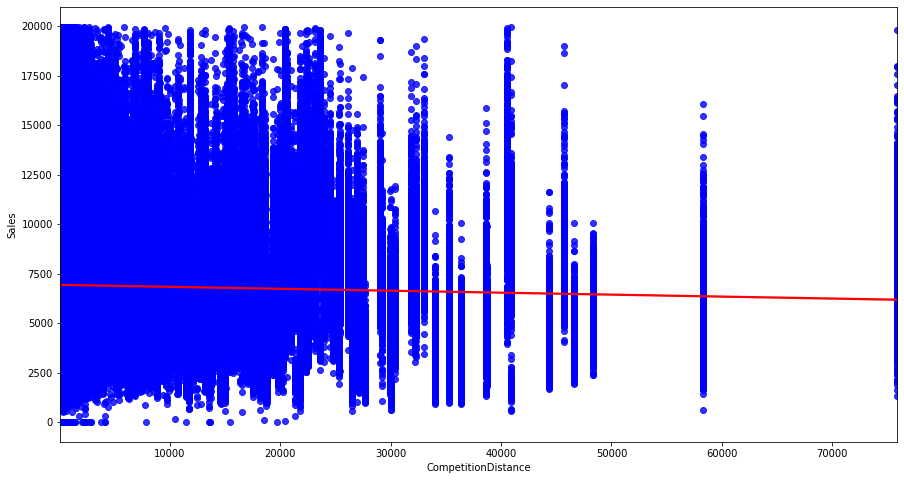

In [ ]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.regplot(x=Final_df['CompetitionDistance'], y = Final_df['Sales'],scatter_kws={"color": "blue"}, line_kws={"color": "red"})

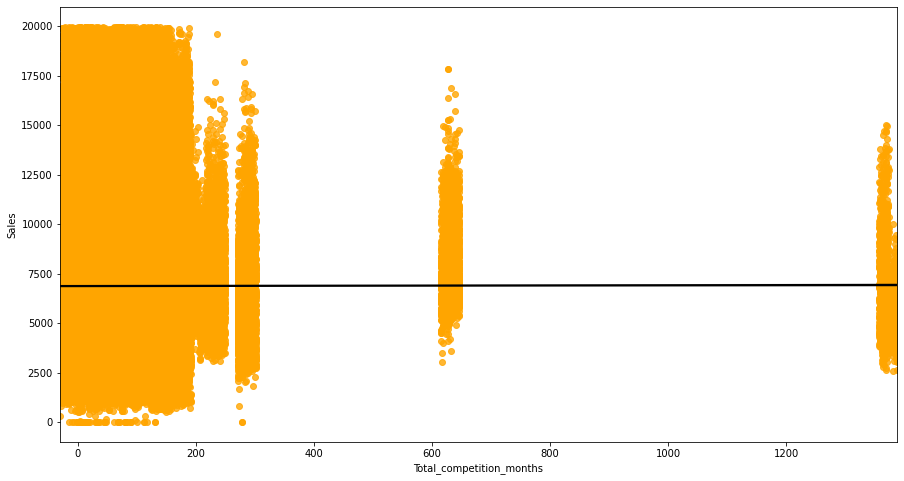

In [ ]:
sns.regplot(x=Final_df['Total_competition_months'], y = Final_df['Sales'],scatter_kws={"color": "orange"}, line_kws={"color": "black"})

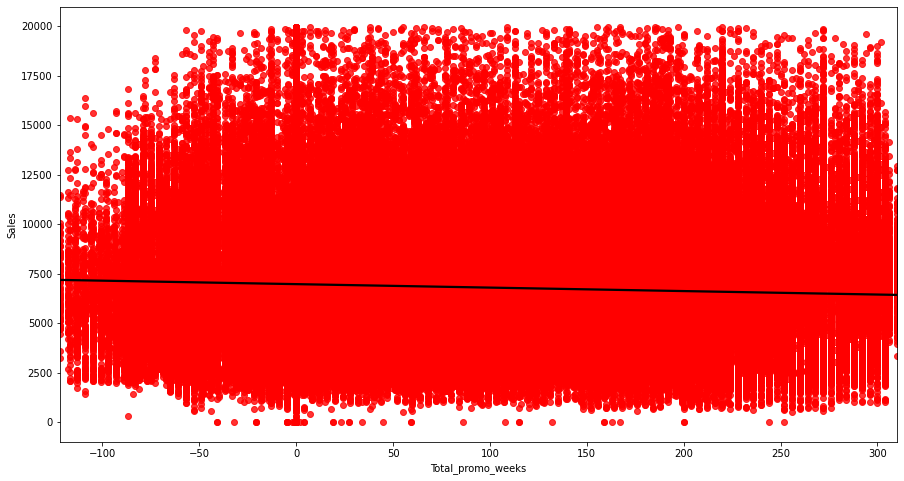

In [ ]:
sns.regplot(x=Final_df['Total_promo_weeks'], y = Final_df['Sales'],scatter_kws={"color": "red"}, line_kws={"color": "black"})

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

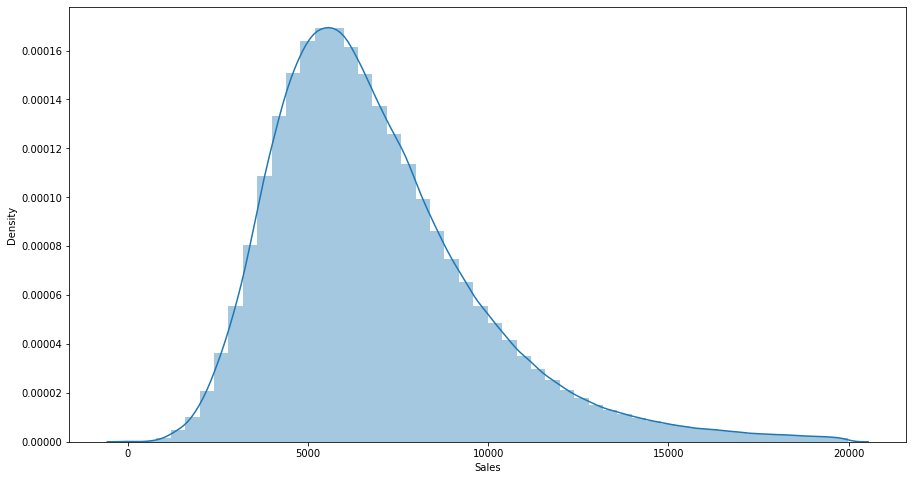

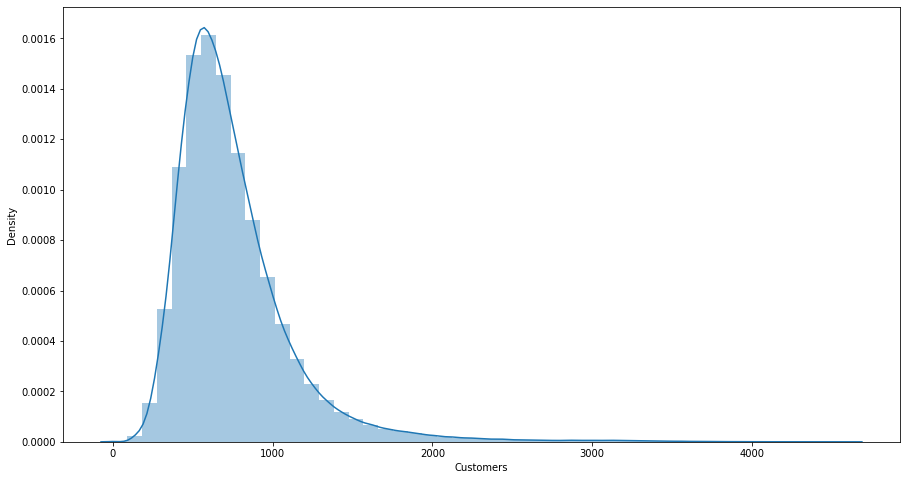

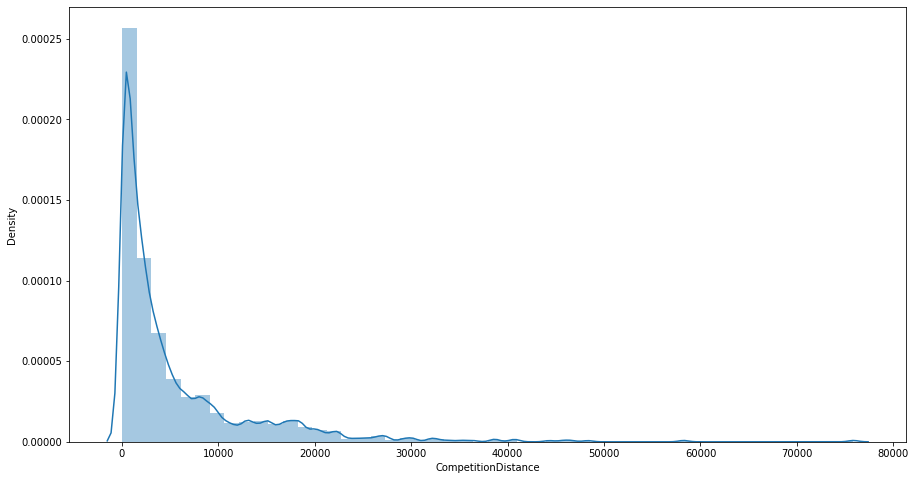

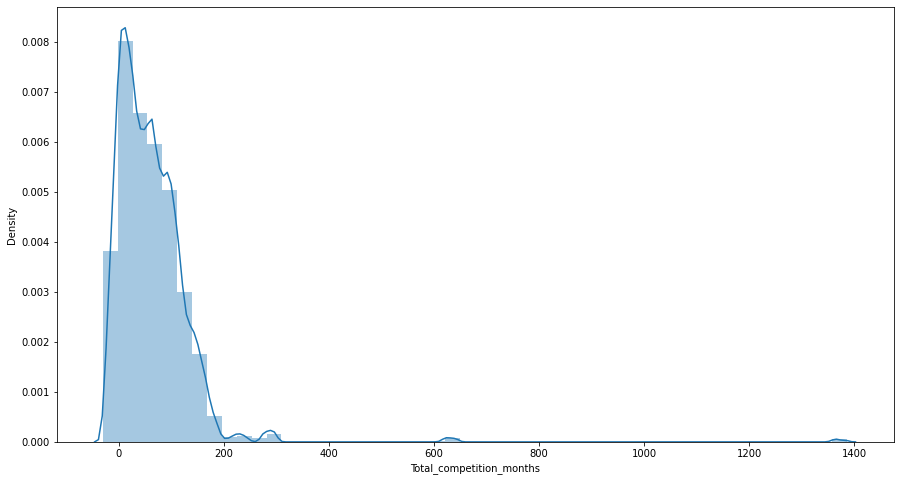

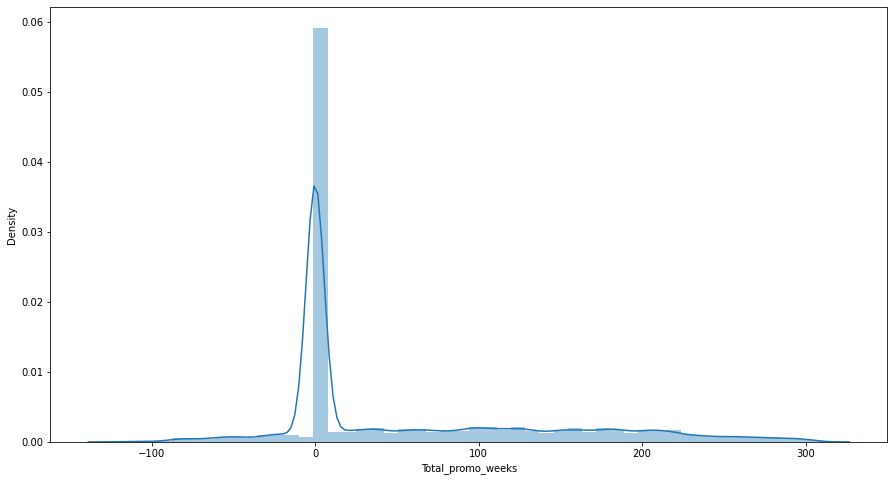

In [ ]:
# Distributions
for col in ['Sales', 'Customers', 'CompetitionDistance', 'Total_competition_months','Total_promo_weeks']:
  plt.figure()
  sns.distplot(Final_df[col])

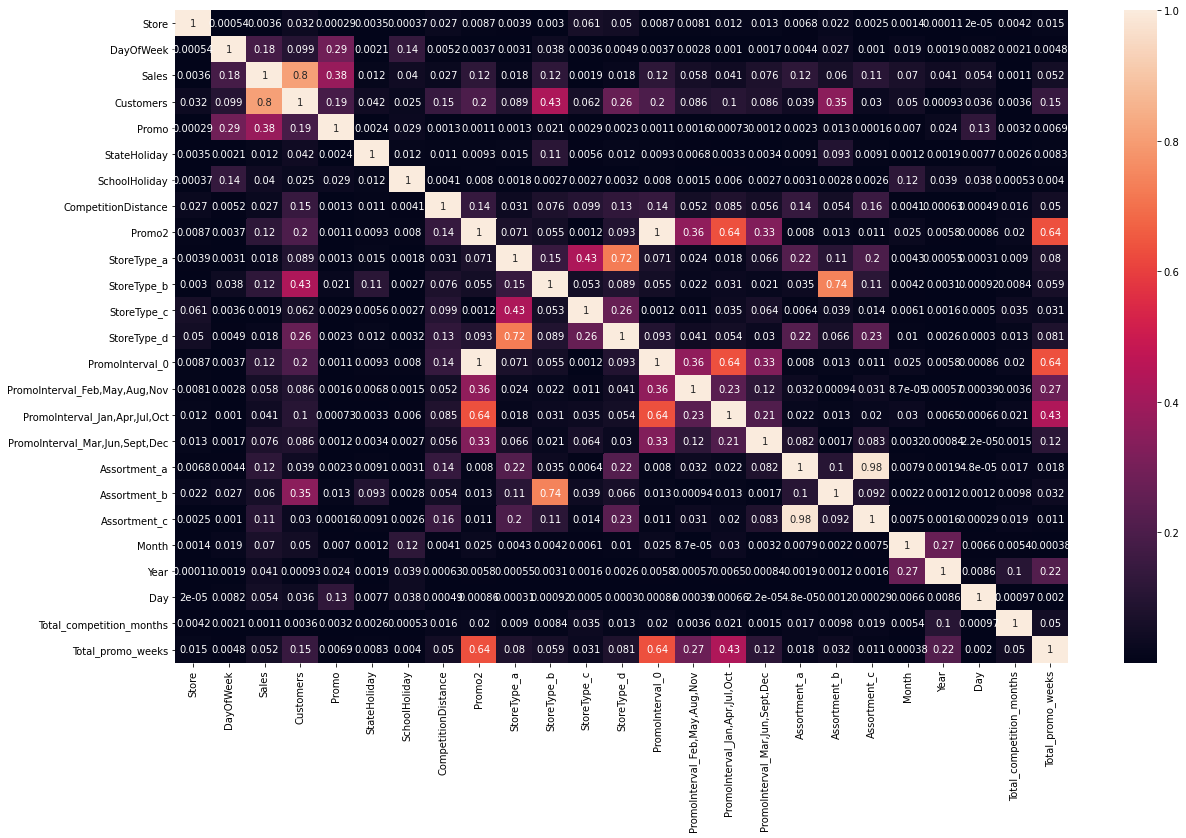

In [ ]:
plt.subplots(figsize=(20,12))
sns.heatmap(Final_df.corr().abs(), annot=True)

In [ ]:
Final_df.to_csv(folder + 'Final_data.csv', index= False)

In [ ]:
Final_df_saved = pd.read_csv(folder + 'Final_data.csv')

In [ ]:
Final_df_saved.shape

(840255, 25)

###**Base Models.**

In [ ]:
# Copy of DataFrame
LR_df = Final_df_saved.copy()

In [ ]:
# Import Required Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression, LassoCV
from sklearn.metrics import r2_score, mean_squared_error, make_scorer


In [ ]:
LR_df['Sales'] = np.sqrt(LR_df['Sales'])
LR_df['Customers'] = np.sqrt(LR_df['Customers'])
LR_df['CompetitionDistance'] = np.sqrt(LR_df['CompetitionDistance'])
#LR_df['Total_competition_months'] = np.log(LR_df['Total_competition_months'])

In [ ]:
X = LR_df.drop(['Sales'], axis = 1)
y = LR_df['Sales']

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#adding constant and building model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

In [ ]:
#statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                 2.378e+05
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        09:58:15   Log-Likelihood:            -2.7667e+06
No. Observations:              840255   AIC:                         5.533e+06
Df Residuals:                  840234   BIC:                         5.534e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -808.1287      9.380    -86.157      0.000    -826.513    -789.745
Store                             -0.0006   2.22e-05    -25.529      0.000      -0.001      -0.001
DayOfWeek                         -0.1090      0.004    -24.942      0.000      -0.118      -0.100
Customers                          2.6666      0.001   1867.486      0.000       2.664       2.669
Promo                              6.1414      0.015    397.062      0.000       6.111       6.172
StateHoliday                       0.3680      0.222      1.657      0.097      -0.067       0.803
SchoolHoliday                      0.1903      0.018     10.394      0.000       0.154       0.226
CompetitionDistance                0.0430      0.000    241.444      0.000       0.043       0.043
Promo2                          -345.6246      4.018    -86.014      0.000    -353.500    -337.749
StoreType_a                     -200.3533      2.345    -85.435      0.000    -204.950    -195.757
StoreType_b                     -213.3914      2.346    -90.948      0.000    -217.990    -208.793
StoreType_c                     -201.1718      2.345    -85.801      0.000    -205.767    -196.576
StoreType_d                     -193.2123      2.345    -82.397      0.000    -197.808    -188.616
PromoInterval_0                 -462.5041      5.361    -86.264      0.000    -473.012    -451.996
PromoInterval_Feb,May,Aug,Nov   -115.1782      1.339    -86.012      0.000    -117.803    -112.554
PromoInterval_Jan,Apr,Jul,Oct   -114.5870      1.339    -85.573      0.000    -117.212    -111.962
PromoInterval_Mar,Jun,Sept,Dec  -115.8594      1.340    -86.439      0.000    -118.486    -113.232
Assortment_a                    -263.0572      3.127    -84.133      0.000    -269.185    -256.929
Assortment_b                    -283.5280      3.127    -90.662      0.000    -289.657    -277.399
Assortment_c                    -261.5435      3.127    -83.642      0.000    -267.672    -255.415
Month                              0.1630      0.002     72.278      0.000       0.159       0.167
Year                               0.8613      0.010     85.822      0.000       0.842       0.881
Day                                0.0072      0.001      8.732      0.000       0.006       0.009
Total_competition_months           0.0008   9.03e-05      8.463      0.000       0.001       0.001
Total_promo_weeks                  0.0060      0.000     52.267      0.000       0.006       0.006
==============================================================================
Omnibus:                    23621.828   Durbin-Watson:                   1.751
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37265.403
Skew:                           0.276   Prob(JB):                         

### Lasso Regression for Feature Importance.

In [ ]:
X = LR_df.drop(['Sales'], axis = 1)
y = LR_df['Sales']

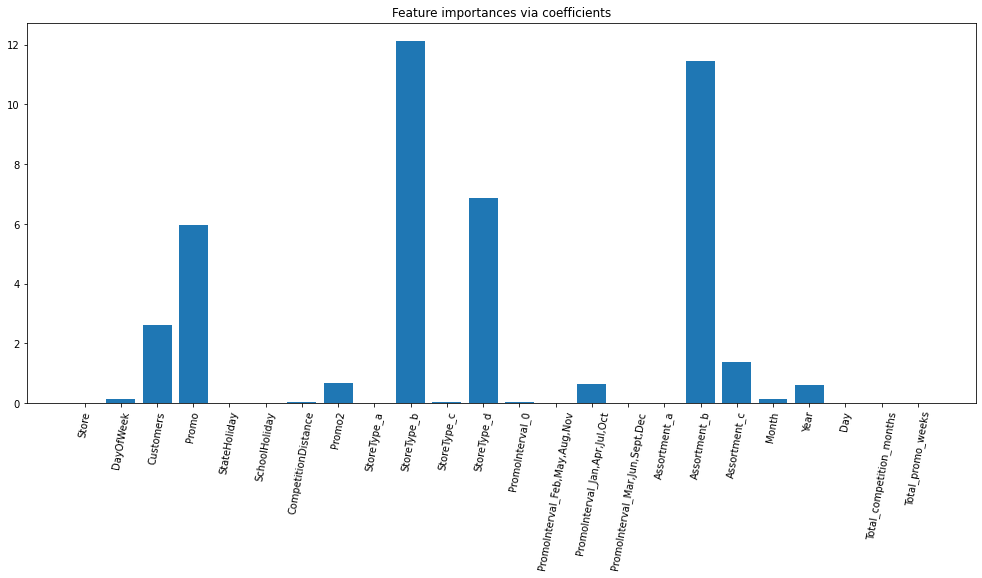

In [ ]:
plt.subplots(figsize=(17,7))
lasso = LassoCV()
lasso.fit(X,y)
importance = np.abs(lasso.coef_)
feature_names = X.columns
plt.bar(height=importance, x=feature_names)
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
sfm = SelectFromModel(lasso).fit(X, y)
feature_names[sfm.get_support()]

Index(['Store', 'DayOfWeek', 'Customers', 'Promo', 'CompetitionDistance',
       'Promo2', 'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'PromoInterval_0', 'PromoInterval_Jan,Apr,Jul,Oct', 'Assortment_b',
       'Assortment_c', 'Month', 'Year', 'Day', 'Total_competition_months',
       'Total_promo_weeks'],
      dtype='object')

###Linear Regression

In [ ]:
X = LR_df.drop(['Sales'], axis = 1)
y = LR_df['Sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Predicting the Test set results
LR_test_pred = LR_model.predict(X_test)

In [ ]:
# Predicting Train
LR_Train_preds = LR_model.predict(X_train)

In [ ]:
LR_test_pred[0:10]

array([ 67.07809252,  58.38476172, 107.90142258, 103.22547044,
        95.87171696,  85.85106939,  84.13412244,  78.49463618,
        80.05116812,  94.56566849])

In [ ]:
# MSE
mean_squared_error(y_test**2,LR_test_pred**2)

1342852.76070664

In [ ]:
# R-sqaured for Train
r2_score(y_train**2, LR_Train_preds**2)

0.8386331124711364

In [ ]:
# R-sqaured for Test
r2_score(y_test**2, LR_test_pred**2)

0.8386523992591703

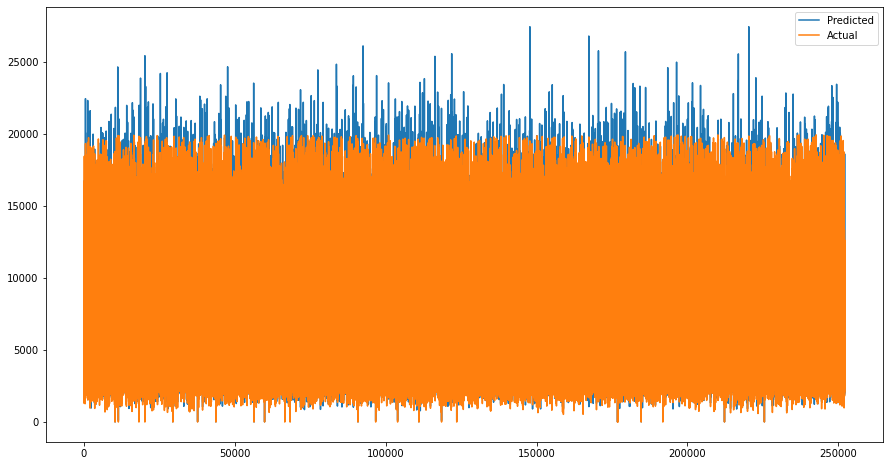

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(LR_test_pred**2)
plt.plot(np.array(y_test**2))
plt.legend(["Predicted","Actual"])
plt.show()

### Almost 96% accuracy on test dataset. Looks a good base model. But there are negative predictions in Sale for some points.

##**Implementing Decision Trees**

In [ ]:
#X = Final_df_saved.drop(['Sales'], axis = 1)
#y = Final_df_saved['Sales']

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
# Criteria
criterion = ['mse']

# Maximum depth of trees
max_depth = [ 18, 20,  25]

# HYperparameter Grid
param_dict = {'max_depth' : max_depth, 'criterion':criterion}

param_dict

{'criterion': ['mse'], 'max_depth': [18, 20, 25]}

In [ ]:
def MSE(y_true,y_pred):
    mse = mean_squared_error(y_true, y_pred)
    print ('MSE: %2.3f' % mse)
    return mse

def R2(y_true,y_pred):    
     r2 = r2_score(y_true, y_pred)
     print ('R2: %2.3f' % r2)
     return r2

def two_score(y_true,y_pred):    
    MSE(y_true,y_pred) #set score here and not below if using MSE in GridCV
    score = R2(y_true,y_pred)
    return score

def two_scorer():
    return make_scorer(two_score, greater_is_better=True) # change for false if using MSE

In [ ]:
# Create an instance of the RandomForestRegressor
DTR_model = DecisionTreeRegressor()

# Grid search
DTR_grid = GridSearchCV(estimator = DTR_model,
                       param_grid = param_dict,
                       cv = 3, verbose=2, scoring =two_scorer())

DTR_grid.fit(X_train,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] criterion=mse, max_depth=18 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MSE: 16.498
R2: 0.942
[CV] ...................... criterion=mse, max_depth=18, total=   4.7s
[CV] criterion=mse, max_depth=18 .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s


MSE: 16.841
R2: 0.940
[CV] ...................... criterion=mse, max_depth=18, total=   4.8s
[CV] criterion=mse, max_depth=18 .....................................
MSE: 16.447
R2: 0.942
[CV] ...................... criterion=mse, max_depth=18, total=   4.7s
[CV] criterion=mse, max_depth=20 .....................................
MSE: 15.858
R2: 0.944
[CV] ...................... criterion=mse, max_depth=20, total=   5.1s
[CV] criterion=mse, max_depth=20 .....................................
MSE: 15.968
R2: 0.943
[CV] ...................... criterion=mse, max_depth=20, total=   5.0s
[CV] criterion=mse, max_depth=20 .....................................
MSE: 15.835
R2: 0.944
[CV] ...................... criterion=mse, max_depth=20, total=   5.1s
[CV] criterion=mse, max_depth=25 .....................................
MSE: 16.113
R2: 0.943
[CV] ...................... criterion=mse, max_depth=25, total=   5.7s
[CV] criterion=mse, max_depth=25 .....................................
MSE: 16.298
R2: 

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   46.7s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['mse'], 'max_depth': [18, 20, 25]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
    

In [ ]:
DTR_optimal_model = DTR_grid.best_estimator_
DTR_optimal_model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=20,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
DTR_grid.best_params_

{'criterion': 'mse', 'max_depth': 20}

In [ ]:
DTR_grid.best_score_

0.9438611349036824

In [ ]:
#feature_names = X.columns

In [ ]:
feature_importances = pd.DataFrame(DTR_optimal_model.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [ ]:
#feature_importances

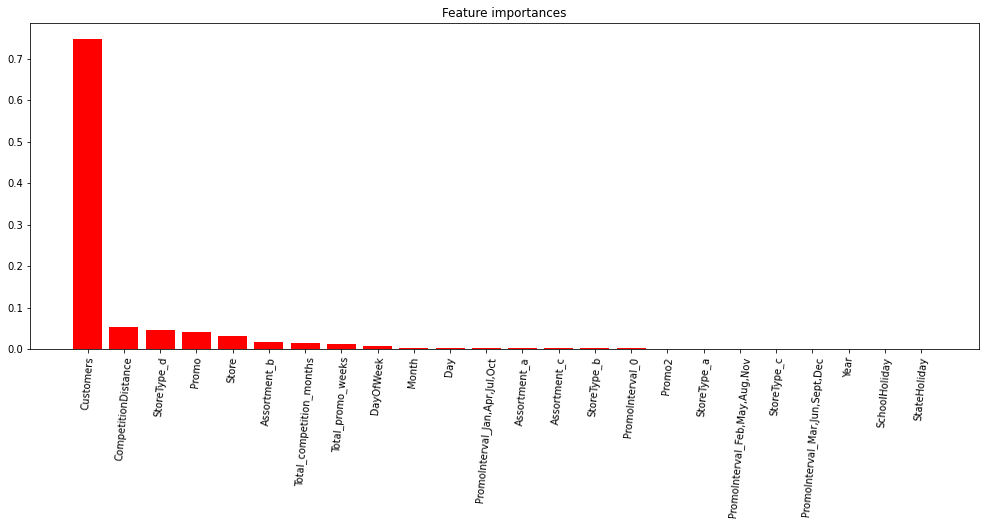

In [ ]:
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances.index, feature_importances['importance'],
        color="r",  align="center")
plt.xticks(feature_importances.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
# Predictions Train and Test
DTR_train_pred = DTR_optimal_model.predict(X_train)
DTR_test_pred = DTR_optimal_model.predict(X_test)

In [ ]:
DTR_train_pred[0:10]

array([ 5365.775     ,  5194.        , 12030.        ,  4322.66580311,
        6155.375     ,  5101.30769231,  2584.        ,  5910.        ,
        3865.35483871,  2274.5       ])

In [ ]:
DTR_test_pred[0:10]

array([ 3586.        ,  1900.6       , 13107.66666667, 11522.75      ,
        9025.27272727,  7470.7826087 ,  6304.25      ,  6546.33333333,
        6847.75      ,  8571.        ])

In [ ]:
# MSE - Test 
mean_squared_error(y_test,DTR_test_pred)

13.92627750507255

In [ ]:
# R-sqaured for Train
r2_score(y_train, DTR_train_pred)

0.982954647783232

In [ ]:
# R-sqaured for Test
r2_score(y_test, DTR_test_pred)

0.9504642535652705

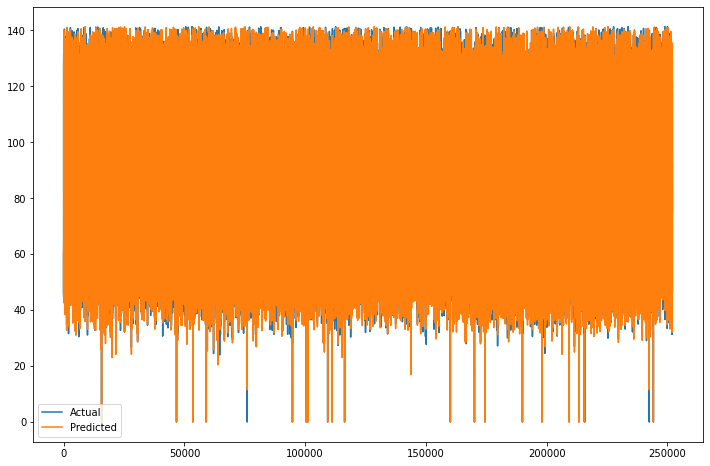

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(np.array(y_test))
plt.plot(DTR_test_pred)
plt.legend(["Actual","Predicted"])
plt.show()

###Almost 97% accuracy on test data as well. So doesn't seem to be overfitting. 

### This model gets rid of negative predictions. 

In [ ]:
from sklearn.svm import SVR

In [ ]:
# Setting parameters for Grid Search CV

# kernel
kernel = ['poly']

# C
C = [100, 1000]

# gamma
gamma = [ 1e-7, 1e-4]

#epsilon
epsilon = [0.1,0.2,0.5,0.3]


parameters = { 'kernel' : kernel,
              'C' : C , 'gamma' : gamma, 'epsilon' : epsilon
              }

parameters

{'C': [100, 1000],
 'epsilon': [0.1, 0.2, 0.5, 0.3],
 'gamma': [1e-07, 0.0001],
 'kernel': ['linear', 'poly', 'rbf']}

In [ ]:
# Grid search
SVR_grid = GridSearchCV(estimator=SVR(),
                       param_grid = parameters, n_jobs = -1,
                       cv = 3, verbose=2)

#SVR_grid.fit(X_train,y_train)          # Time consuming 

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Criterion
criterion = ['mse']
# Maximum depth of trees
max_depth = [20]

# Number of estimator
n_estimators = [20,50,100]
# HYperparameter Grid
param_dict = {'max_depth' : max_depth, 'criterion':criterion,'n_estimators':n_estimators}

param_dict

{'criterion': ['mse'], 'max_depth': [20], 'n_estimators': [20, 50, 100]}

In [ ]:
# Create an instance of the DecisionTreeClassifier
rf_model = RandomForestRegressor()

# Grid search
rf_grid = GridSearchCV(estimator = rf_model,
                       param_grid = param_dict,
                       cv = 3, verbose=2, scoring = 'r2' )

rf_grid.fit(X_train,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] criterion=mse, max_depth=20, n_estimators=20 ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... criterion=mse, max_depth=20, n_estimators=20, total= 1.2min
[CV] criterion=mse, max_depth=20, n_estimators=20 ....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min remaining:    0.0s


[CV] ..... criterion=mse, max_depth=20, n_estimators=20, total= 1.2min
[CV] criterion=mse, max_depth=20, n_estimators=20 ....................
[CV] ..... criterion=mse, max_depth=20, n_estimators=20, total= 1.2min
[CV] criterion=mse, max_depth=20, n_estimators=50 ....................
[CV] ..... criterion=mse, max_depth=20, n_estimators=50, total= 3.0min
[CV] criterion=mse, max_depth=20, n_estimators=50 ....................
[CV] ..... criterion=mse, max_depth=20, n_estimators=50, total= 3.0min
[CV] criterion=mse, max_depth=20, n_estimators=50 ....................
[CV] ..... criterion=mse, max_depth=20, n_estimators=50, total= 2.9min
[CV] criterion=mse, max_depth=20, n_estimators=100 ...................
[CV] .... criterion=mse, max_depth=20, n_estimators=100, total= 5.9min
[CV] criterion=mse, max_depth=20, n_estimators=100 ...................
[CV] .... criterion=mse, max_depth=20, n_estimators=100, total= 5.7min
[CV] criterion=mse, max_depth=20, n_estimators=100 ...................
[CV] .

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 29.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
rf_grid.best_params_

{'criterion': 'mse', 'max_depth': 20, 'n_estimators': 100}

In [ ]:
rf_optimal_model = rf_grid.best_estimator_

In [ ]:
y_pred_train_rf = rf_optimal_model.predict(X_train)   # Prediction for train dataset
y_pred_test_rf = rf_optimal_model.predict(X_test)     # Predictionfor test dataset

In [ ]:
MSE  = mean_squared_error((y_test), (y_pred_test_rf))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMSPE = rmpse(y_test, y_pred_test_rf)
print("RMSPE :", RMSPE)

MSE : 250865.31953356008
RMSE : 500.8645720487326
RMSPE : inf


In [ ]:
r2_score((y_test), (y_pred_test_rf))

0.9698578141995837

In [ ]:
r2_score((y_train), (y_pred_train_rf))

-191353.2372589989

###Feature Importance

In [ ]:
feature_importances = pd.DataFrame(rf_optimal_model.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

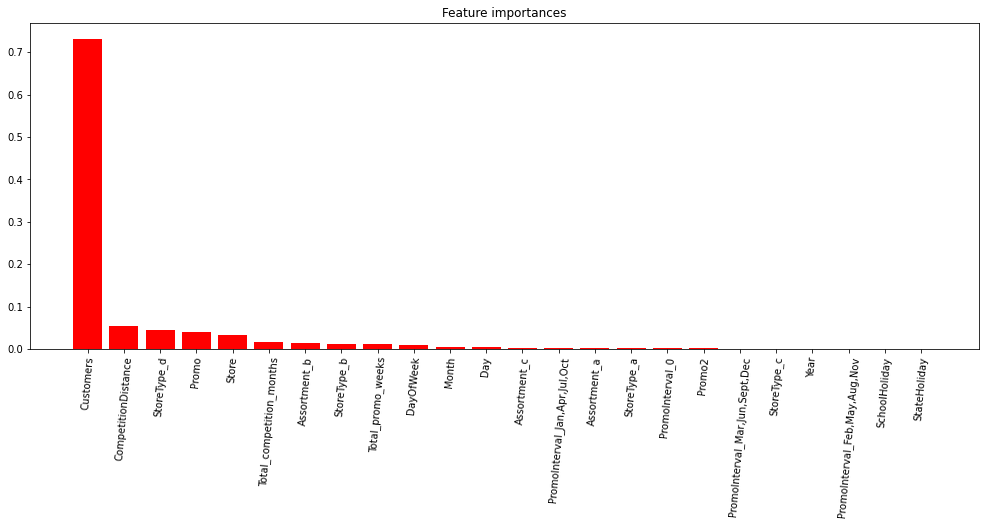

In [ ]:
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances.index, feature_importances['importance'],
        color="r",  align="center")
plt.xticks(feature_importances.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

###LIGHT GBM

In [ ]:
import lightgbm as lgb

In [ ]:
# Maximum depth of trees
max_depth = [12, 15,20, 22]

# bagging fraction
bagging_fraction = [0.5, 0.6,0.7, 0.8]

#max-bin
max_bin = [300, 400, 500, 600]

# HYperparameter Grid
param_dict = {'max_depth' : max_depth, 'bagging_fraction':bagging_fraction, 'max_bin': max_bin}

param_dict

{'bagging_fraction': [0.5, 0.6, 0.7, 0.8],
 'max_bin': [300, 400, 500, 600],
 'max_depth': [12, 15, 20, 22]}

In [ ]:
# Create an instance of the RandomForestRegressor
LGB = lgb.LGBMRegressor()

# Grid search
LGB_grid = GridSearchCV(estimator = LGB,
                       param_grid = param_dict,
                       cv = 3, verbose=2)

LGB_grid.fit(X_train,y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] bagging_fraction=0.5, max_bin=300, max_depth=12 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. bagging_fraction=0.5, max_bin=300, max_depth=12, total=   6.0s
[CV] bagging_fraction=0.5, max_bin=300, max_depth=12 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s


[CV] .. bagging_fraction=0.5, max_bin=300, max_depth=12, total=   6.0s
[CV] bagging_fraction=0.5, max_bin=300, max_depth=12 .................
[CV] .. bagging_fraction=0.5, max_bin=300, max_depth=12, total=   6.1s
[CV] bagging_fraction=0.5, max_bin=300, max_depth=15 .................
[CV] .. bagging_fraction=0.5, max_bin=300, max_depth=15, total=   6.0s
[CV] bagging_fraction=0.5, max_bin=300, max_depth=15 .................
[CV] .. bagging_fraction=0.5, max_bin=300, max_depth=15, total=   6.0s
[CV] bagging_fraction=0.5, max_bin=300, max_depth=15 .................
[CV] .. bagging_fraction=0.5, max_bin=300, max_depth=15, total=   6.0s
[CV] bagging_fraction=0.5, max_bin=300, max_depth=20 .................
[CV] .. bagging_fraction=0.5, max_bin=300, max_depth=20, total=   6.2s
[CV] bagging_fraction=0.5, max_bin=300, max_depth=20 .................
[CV] .. bagging_fraction=0.5, max_bin=300, max_depth=20, total=   6.2s
[CV] bagging_fraction=0.5, max_bin=300, max_depth=20 .................
[CV] .

[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed: 19.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'bagging_fraction': [0.5, 0.6, 0.7, 0.8],
                         'max_bin': [300, 400, 500, 600],
                         'max_depth': [12, 15, 20, 22]}

In [ ]:
LGB_grid.best_score_

0.9317240098411507

In [ ]:
optimal_model = LGB_grid.best_estimator_
optimal_model

LGBMRegressor(bagging_fraction=0.5, boosting_type='gbdt', class_weight=None,
              colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
              max_bin=500, max_depth=15, min_child_samples=20,
              min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
              n_jobs=-1, num_leaves=31, objective=None, random_state=None,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [ ]:
LGB_grid.best_params_

{'bagging_fraction': 0.5, 'max_bin': 500, 'max_depth': 15}

In [ ]:
feature_importances = pd.DataFrame(optimal_model.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

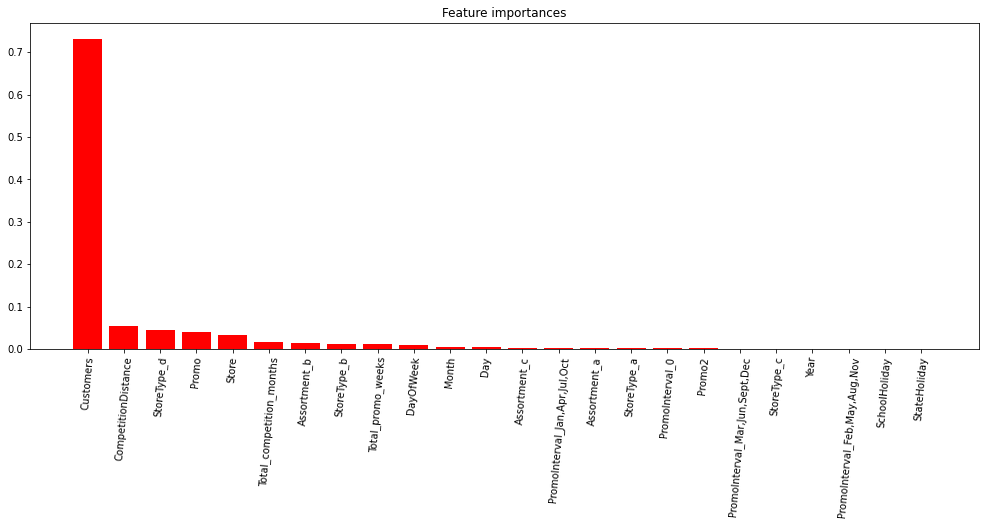

In [ ]:
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances.index, feature_importances['importance'],
        color="r",  align="center")
plt.xticks(feature_importances.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
LGB_train_pred[0:10]

array([ 4660.74222848,  5374.44774783, 12824.68026379,  4601.59911206,
        6530.71483991,  5012.90742931,  2810.48620376,  5533.4171189 ,
        4241.62272491,  2261.8050303 ])

In [ ]:
LGB_test_pred[0:10]

array([ 4279.56545141,  3135.03900845, 13177.3484163 , 10745.31609011,
        9057.49805971,  7036.03757233,  6773.68797042,  5881.62579574,
        6970.80927382,  8420.01546917])

In [ ]:
# MSE - Test 
mean_squared_error(y_test,LGB_test_pred)

579406.3131442972

In [ ]:
# R-sqaured for Train
r2_score(y_train, LGB_train_pred)

0.9310053201446981

In [ ]:
# R-sqaured for Test
r2_score(y_test, LGB_test_pred)

0.9303826739495045

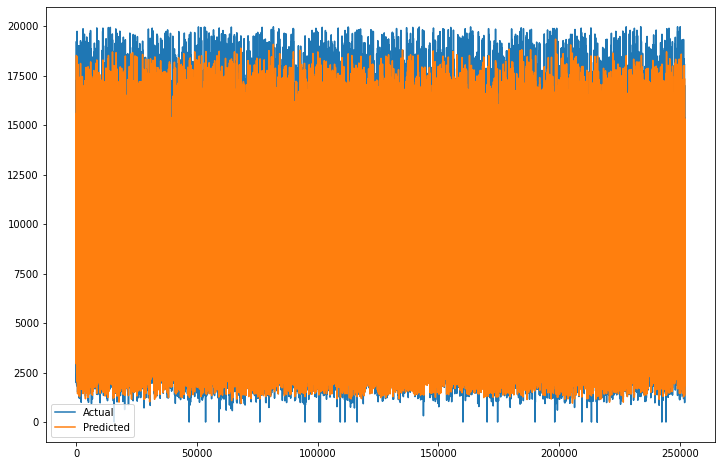

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(np.array(y_test))
plt.plot(LGB_test_pred)
plt.legend(["Actual","Predicted"])
plt.show()

In [ ]:
from sklearn.metrics import explained_variance_score

In [ ]:
# TRain
explained_variance_score(y_train, LGB_train_pred)

0.9310053201446981

In [ ]:
# Test
explained_variance_score(y_test, LGB_test_pred)

0.9303828898569036

In [ ]:
#from sklearn.metrics import mean_squared_log_error

In [ ]:
def rmse(y_true, y_pred):
    '''
    Compute Root Mean Square Percentage Error between two arrays.
    '''
    loss = np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true))))

    return loss

In [ ]:
def rmpse(y_true, y_pred):
    '''
    Compute Root Mean Square Percentage Error between two arrays.
    '''
    loss = np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true))))*100

    return loss

In [ ]:
rmse(y_test, DTR_test_pred)

inf